In [81]:
# Importar librerías necesarias para el análisis y la visualización de datos
import pandas as pd  # para manipulación de datos
import numpy as np   # para operaciones numéricas
import seaborn as sns  # para visualización de datos
import matplotlib.pyplot as plt  # para graficar
from sklearn.preprocessing import StandardScaler, LabelEncoder  # para normalización y codificación de datos
from sklearn.cluster import KMeans  # para aplicar el algoritmo de clustering K-means
from sklearn.metrics import silhouette_score, calinski_harabasz_score  # para evaluar el desempeño del modelo
from scipy.cluster.hierarchy import dendrogram, linkage  # para clustering jerárquico
import os  # para configuraciones del sistema

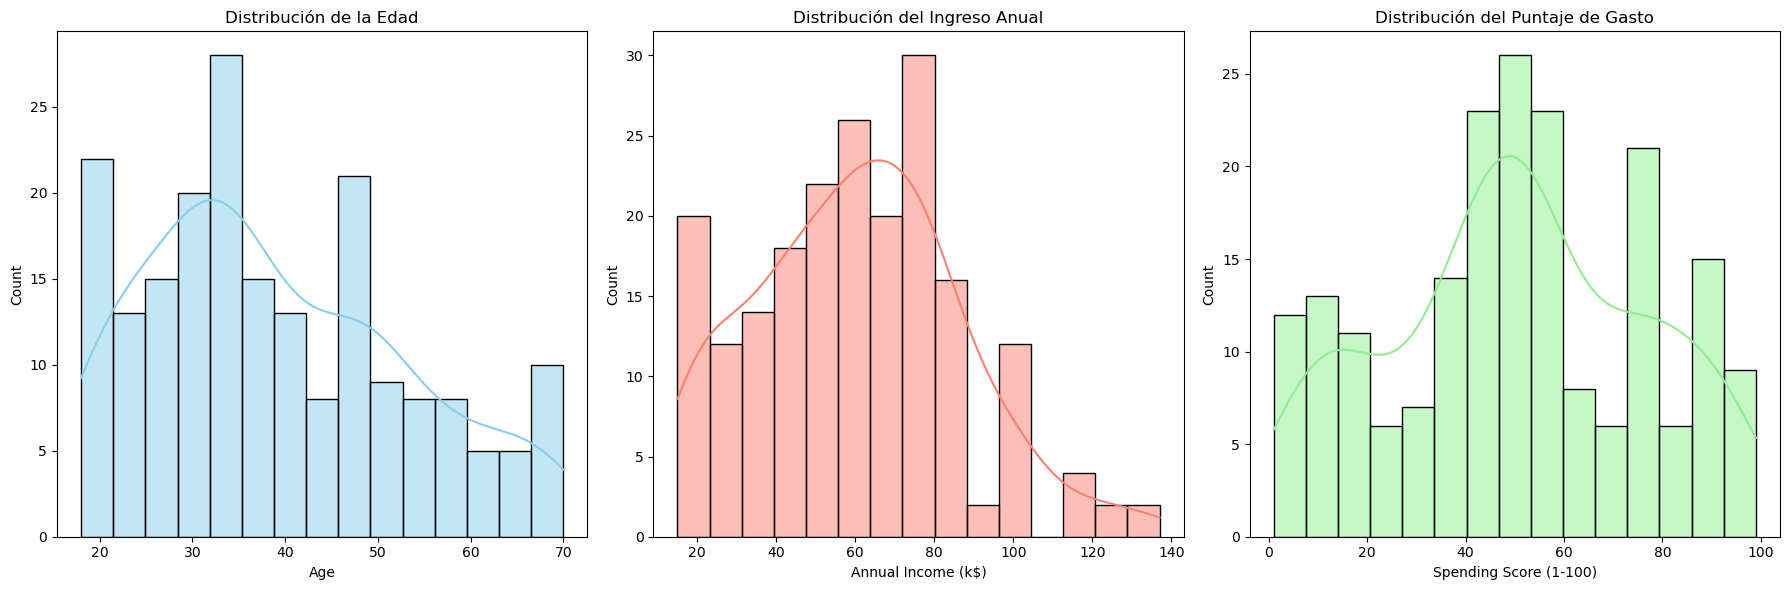

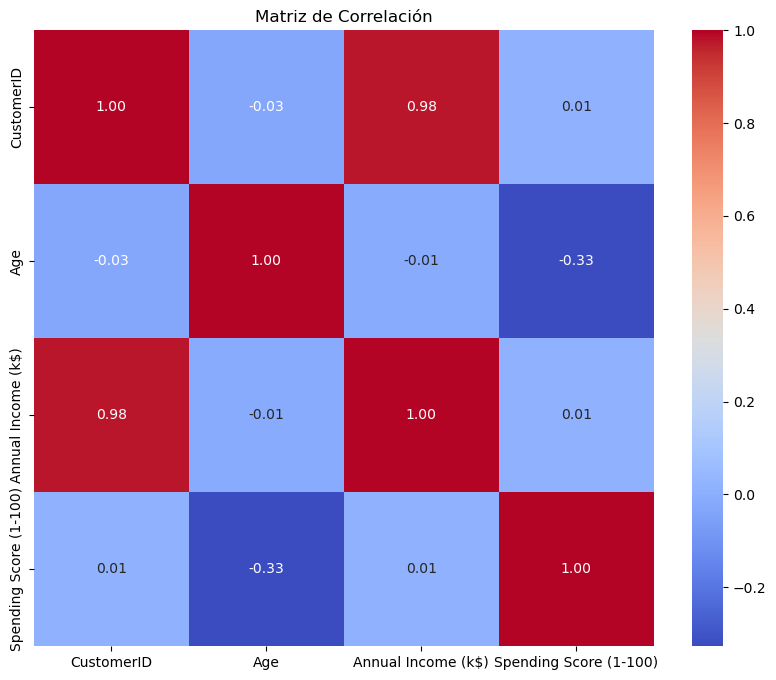

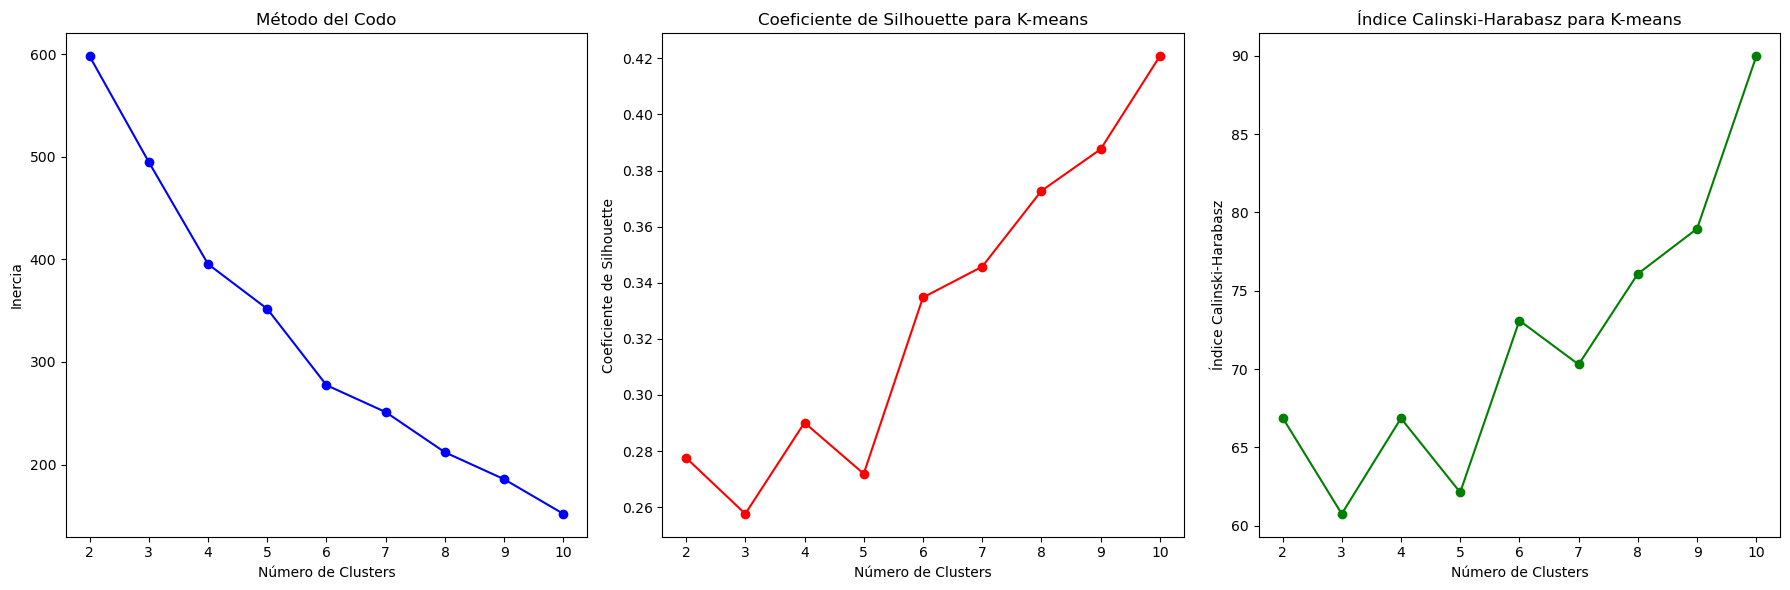

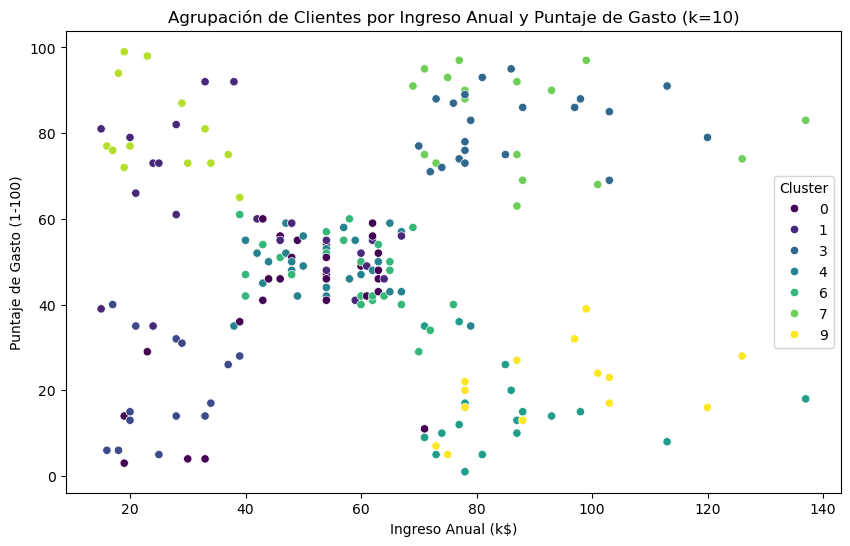

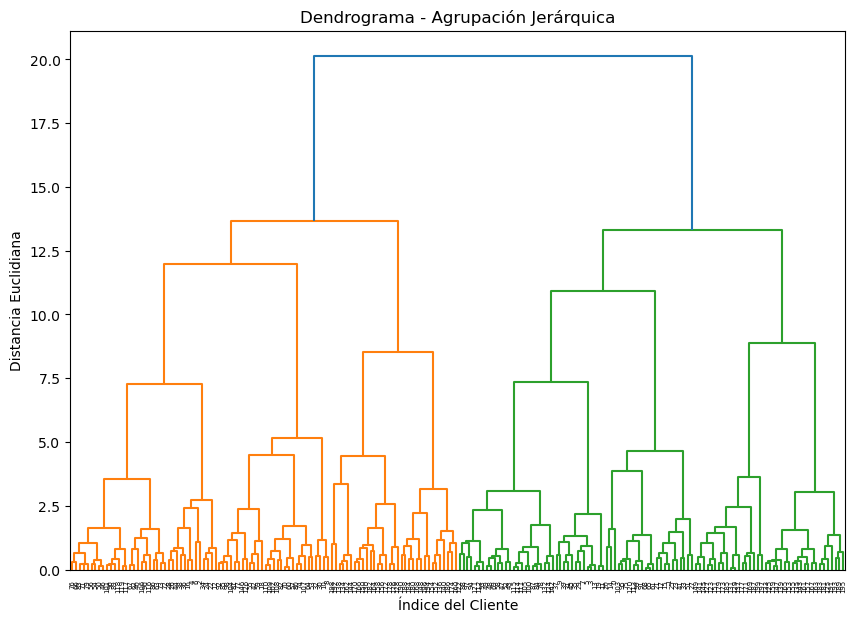

Número óptimo de clusters (K-means): 10
Coeficiente Silhouette: 0.42076374869477745
Índice Calinski-Harabasz: 89.97819558254271


In [83]:
# Configuración de variables de entorno
os.environ["OMP_NUM_THREADS"] = "1"  # Limita el número de hilos en operaciones paralelas para evitar problemas de rendimiento

# Cargar los datos desde un archivo CSV
data = pd.read_csv('D:\\UNAD_ANDRES\\Mall_Customers.csv')

# Análisis exploratorio de los datos para entender la distribución de algunas variables clave
plt.figure(figsize=(18, 6))

# Crear un histograma de la columna 'Age' para visualizar su distribución
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, bins=15, color='skyblue')
plt.title('Distribución de la Edad')

# Crear un histograma de la columna 'Annual Income (k$)' para visualizar su distribución
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, bins=15, color='salmon')
plt.title('Distribución del Ingreso Anual')

# Crear un histograma de la columna 'Spending Score (1-100)' para visualizar su distribución
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=15, color='lightgreen')
plt.title('Distribución del Puntaje de Gasto')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Visualización de la matriz de correlación entre las variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Preprocesamiento de los datos antes del análisis
# Codificación de la columna 'Gender' de tipo texto a valores numéricos
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Seleccionar variables para el análisis de clustering y eliminar filas con valores nulos
data_clustering = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
data_clustering.dropna(inplace=True)

# Normalizar los datos para tener una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clustering)

# Selección del número óptimo de clusters utilizando diferentes métricas
range_n_clusters = list(range(2, 11))  # Rango de clusters a probar
inertia = []  # Lista para almacenar los valores de inercia
silhouette_avg = []  # Lista para almacenar los valores de coeficiente de Silhouette
calinski_harabasz = []  # Lista para almacenar los valores de índice Calinski-Harabasz

# Calcular métricas para cada número de clusters en el rango
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(data_normalized, kmeans.labels_))
    calinski_harabasz.append(calinski_harabasz_score(data_normalized, kmeans.labels_))

# Graficar los resultados para analizar el mejor número de clusters
plt.figure(figsize=(18, 6))

# Gráfico del Método del Codo (Elbow Method)
plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, inertia, marker='o', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

# Gráfico del Coeficiente de Silhouette
plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, silhouette_avg, marker='o', color='r')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para K-means')

# Gráfico del Índice Calinski-Harabasz
plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, calinski_harabasz, marker='o', color='g')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice Calinski-Harabasz')
plt.title('Índice Calinski-Harabasz para K-means')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Entrenamiento final del modelo K-means con el número óptimo de clusters
optimal_k = silhouette_avg.index(max(silhouette_avg)) + 2  # Elige el mejor número de clusters basado en el coeficiente de Silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_normalized)
data['Cluster'] = kmeans.labels_  # Agrega los resultados de clustering al DataFrame original

# Visualización final de los clusters resultantes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title(f'Agrupación de Clientes por Ingreso Anual y Puntaje de Gasto (k={optimal_k})')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

# Visualización de un dendrograma para el análisis de clustering jerárquico
linked = linkage(data_normalized, method='ward')  # Calcular enlaces jerárquicos utilizando el método de Ward
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma - Agrupación Jerárquica')
plt.xlabel('Índice del Cliente')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Evaluación final del modelo K-means
print(f'Número óptimo de clusters (K-means): {optimal_k}')
print(f'Coeficiente Silhouette: {max(silhouette_avg)}')
print(f'Índice Calinski-Harabasz: {calinski_harabasz[optimal_k - 2]}')